# Examen 2 
- Author: Ricardo Vallejo
- Date: 2020 - 12 -08

## 1.1.  Téléchargez le contenu de la base de données iris

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy.stats
import seaborn as sns



df = pd.read_excel("Icecream.xlsx")
pd.set_option('display.max_rows', None)
df.head(10)


,jour,cons,income,price,temp
0,1,0.386,78,0.270,41
1,2,0.374,79,0.282,56
2,3,0.393,81,0.277,63
3,4,0.425,80,0.280,68
4,5,0.406,76,0.272,69
5,6,0.344,78,0.262,65
6,7,0.327,82,0.275,61
7,8,0.288,79,0.267,47
8,9,0.269,76,0.265,32
9,10,0.256,79,0.277,24


## 1.2. Identifier les différentes variables et leurs types.


In [9]:
print('General info:')
data.info()

General info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   jour    32 non-null     int64  
 1   cons    32 non-null     float64
 2   income  32 non-null     int64  
 3   price   32 non-null     float64
 4   temp    32 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 1.4 KB


Variable price et cons sont point flotant, et jour, temp et income sont integers

In [11]:
#General

print('Row or individues count is:',data.shape[0])
print('Variables or columns count is:',data.shape[1])


Row or individues count is: 32
Variables or columns count is: 5


## 2.1.  Détectez les données aberrantes à l’aide d’une analyse graphique. Commentez le graphique obtenu.


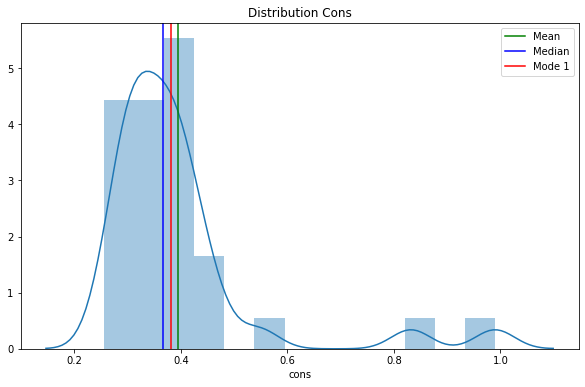

In [12]:
mean=df['cons'].mean();
median=df['cons'].median();
mode=df['cons'].mode();
fig, ax = plt.subplots(figsize=(10,6));

sns.distplot(df['cons']);
plt.title('Distribution Cons');
plt.axvline(mean,color='green',label='Mean'); 
plt.axvline(median,color='blue',label='Median');
plt.axvline(mode[0],color='red',label='Mode 1')

plt.legend();

Graphiquement on peut regarder de donnes aberrants au tour de 0,85 et 0,9, cette donnes aberrants sont dehors de quartiles accepte.


## 2.2.  Supprimez donne aberrants

In [24]:
# random data points to calculate z-score
data = df['cons']
mean = np.mean(data) # calculate mean
sd = np.std(data) # calculate standard deviation

threshold = 2
outliers = []

for i in data: 
    z = (i-mean)/sd # calculate z-score
    if abs(z) > threshold:  # identify outliers
        outliers.append(i) # add to the empty list
 
print("The detected outliers are: ", outliers) 

dfPreprocessed = df[df.cons < 0.8320000000000001]
dfPreprocessed.info()

# On a verifie que le deux donnes aberrant ont ete enleves

The detected outliers are:  [0.8320000000000001, 0.99]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   jour    30 non-null     int64  
 1   cons    30 non-null     float64
 2   income  30 non-null     int64  
 3   price   30 non-null     float64
 4   temp    30 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 1.4 KB


## 3.1.  Déterminez la matrice de corrélation des variables

In [25]:
matrice_correlation = dfPreprocessed.corr().round(2)
print(matrice_correlation)

        jour  cons  income  price  temp
jour    1.00  0.22    0.84  -0.07 -0.10
cons    0.22  1.00    0.05  -0.26  0.78
income  0.84  0.05    1.00  -0.11 -0.32
price  -0.07 -0.26   -0.11   1.00 -0.11
temp   -0.10  0.78   -0.32  -0.11  1.00


## 3.2.  Représentez visuellement cette matrice.


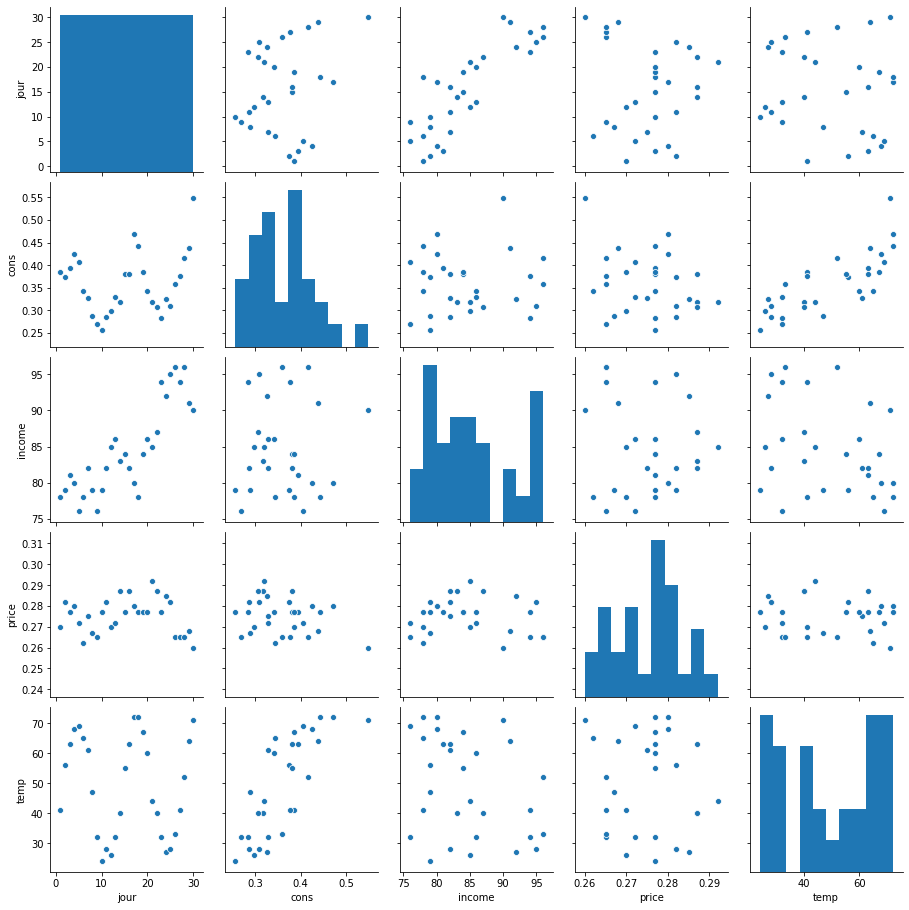

In [26]:
import seaborn as sns

sns.pairplot(dfPreprocessed[['jour', 'cons', 'income', 'price', 'temp']])
plt.show()

Le meilleur coeficient de correlation cest jour avec income: 0,84, mais pas bcp de significat dans l'analyses cette correlation, la variable jour c'est nest pas important dans l'analyses.  


Autre relation de cons vs Temp: 0,76 permet d'etablire une relation lineaire entre  le consumation de icecream et temperature, si augmente la temperature augmente le consumation pour persone.

Les autres variables pn peut pas les modeler comme lineaires, et les avec coef>0,7 et <0,9 sont fiables comme aproximation.


## 4.1. 

- Variable explicative:  Prix
- Variable expliquee:  cons
        

## 4.2

In [30]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

x1 = np.array(dfPreprocessed["price"]).reshape((-1,1))
y1 = dfPreprocessed['cons']

mymodel = LinearRegression()
results = mymodel.fit(x1,y1)

print("Coeficient determination: \n", results.score(x1, y1))
print("Intercept: \n", results.intercept_)
print("Slope: \n", results.coef_)

Coeficient determination: 
 0.06738904552840508
Intercept: 
 0.9230324365390012
Slope: 
 [-2.04721796]


La ecuacion est:  y = -2.04721796 x + 0,92

## 4.3 

Le model ne fit pas bien le donnes, le coeficient de correlation le confirme (0,716), est tres bas, meme que le coeficient de determination (0,067)

Aussi les coeficient de correlation de la consumation sont linear correlies seulement a la temperature.

## 5.1

- Variable explicative:  income, prix, temp
- Variable expliquee:  cons

## 5.2.

In [45]:
from sklearn import datasets, linear_model
from statsmodels.formula.api import ols
dfPreprocessed.keys()


Index(['jour', 'cons', 'income', 'price', 'temp'], dtype='object')

In [46]:
x1 = dfPreprocessed['income']
x2 = dfPreprocessed['price']
x3 = dfPreprocessed['temp']
y = dfPreprocessed['cons']

In [47]:
#Model

modelMulti = ols('y ~ x1 + x2 + x3', data=dfPreprocessed).fit()  # Ajusta el modelo usando el registro natural de uno de los regresores
print(modelMulti.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     22.17
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           2.45e-07
Time:                        19:17:53   Log-Likelihood:                 58.619
No. Observations:                  30   AIC:                            -109.2
Df Residuals:                      26   BIC:                            -103.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1973      0.270      0.730      0.4

In [55]:
print(modelMulti.rsquared)

0.7189938520147974


## cons = 0.0033 income - 1.0444 price + 0.0035 temp + 0.19

## 5.3. 

Les coeficiente de correlation x1, x2, x3 sont tres loin de 1, mais le modele general a un indicative de confiance de 0,719=R2

Les donnes ont bas correlation lineaire entre eaux, le model n'est pas un bonne aproximation.

## 5.4. 

In [67]:
xincome=90
xprice=0.2
xtemp=71
xcons = 0.0033*xincome - 1.0444*xprice + 0.0035* xtemp + 0.19
print(xcons)

0.52662


## Le consumation par persone cest 0,5262 taces sur les conditions donnes.